In [91]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from scipy.stats import zipf
import numpy as np
from scipy.interpolate import make_interp_spline
from collections import Counter
import re

In [7]:
def parseXmlFile(xmlFile):
  # Funtion to take in an .xml file as a parameter
  # and iterates over the children of the ElementTree
  # looking for a Title attribute. If found it stores
  # the string associated with the title attribute
  # in the titleWordsList. Once it has iterated over
  # the entire file it returns the list.
  #
  # xmlFile : string -> string represenation of xml file path
  # titleWords : list -> result list that stores all words
  # found within a rows Title attribute

  tree = ET.parse(xmlFile)
  root = tree.getroot()

  titleWords = []

  for child in root:
    attribute = child.attrib
    if 'Title' in attribute:
      titleWords.append(attribute['Title'])
  
  return titleWords

In [8]:
def convertToListOfWords(sentenceList):
  # Function to convert the list of sentence 
  # strings passed in as a parameter into a list
  # of words with punctuation removed. It leverages
  # pythons re library, checking for any patterns
  # that arent a word or whitespace and replaces them 
  # with whitespace. It then splits the sentences 
  # into a list of words and those words are appended
  # to the returned list.
  #
  # sentenceList : list -> passed parameter list of 
  #         sentence strings
  #
  # convertedList : list -> returned list of words with
  #         punctuation removed 
  convertedList = []

  for sentence in sentenceList:
    sentWithoutPunct = re.sub(r'[^\w\s]', '', sentence)
    words = sentWithoutPunct.split()
    for word in words:
      word = word.lower()
      convertedList.append(word)
  
  return convertedList

In [92]:
def zipfLawPlot(wordsList):
  # Function to take in a list of words and create a 
  # Zipf's law plot. Creates a dictionary of words in list
  # and their frequencies. It then sorts the words by their
  # frequency in descending order.
  #
  # wordsList : list -> passed parameter list of words found
  #         in the coffee stack exchanges question titles

  # Count the frequency of each word
  word_counts = dict(Counter(wordsList).most_common(30))
  
  sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
  # print(sorted_word_counts)
  sorted_frequencies = [y for (x,y) in sorted_word_counts]
  print(len(sorted_frequencies))
  sorted_words = [x for (x,y) in sorted_word_counts]
  print(sorted_words)

  plt.bar([val for val, key in sorted_word_counts], [key for val, key in sorted_word_counts], color='limegreen')
  alpha = 1.37065874
  total = sum([c for p, c in sorted_word_counts])
  plt.plot(range(len(sorted_word_counts)), [zipf.pmf(p, alpha) * total for p in range(1, len(sorted_word_counts) + 1)], color='crimson', lw=3)
  plt.ylabel("Frequencies")
  plt.xlabel("Words")
  plt.xticks(rotation='vertical')
  plt.tight_layout()
  plt.show()

In [93]:
titleWords = parseXmlFile('/content/Posts_Coffee.xml')
wordsToPlot = convertToListOfWords(titleWords)

30
['coffee', 'the', 'to', 'a', 'is', 'how', 'of', 'what', 'i', 'in', 'for', 'does', 'espresso', 'and', 'my', 'with', 'can', 'it', 'do', 'are', 'beans', 'why', 'machine', 'make', 'moka', 'water', 'pot', 'should', 'an', 'brew']


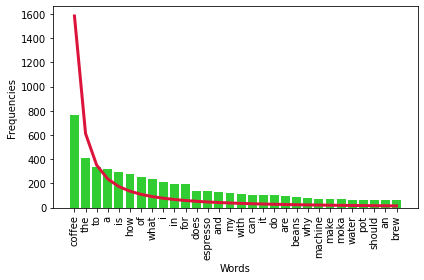

In [94]:
zipfLawPlot(wordsToPlot)

In [90]:
def smoothify(yInput):
    x = np.array(range(0, 30))
    y = np.array(yInput)
    # define x as 600 equally spaced values between the min and max of original x
    x_smooth = np.linspace(x.min(), x.max(), 600) 
    # define spline with degree k=3, which determines the amount of wiggle
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    # Return the x and y axis
    return x_smooth, y_smooth

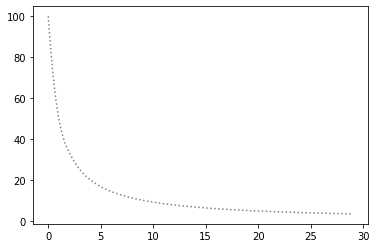

In [80]:
ziffianCurveValues = [100/i for i in range(1, 30+1)]
x, y = smoothify(ziffianCurveValues)
plt.plot(x, y, label='Ziffian Curve', ls=':', color='grey')